In [ ]:
# 1. Gestion de las Librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 2. Carga del dataset
dataset = pd.read_excel('ejemploCalificacionesExcel.xlsx', index_col=0)
dataset

,NOMBRES,APELLIDOS,Programa,Genero,Matematicas,Español,Ciencias,Idiomas
ITEM,,,,,,,,
1,Juan,García,Contabilidad,M,1.66,2.19,3.56,2.58
2,María,Pérez,Mercadeo,Femenino,3.21,2.54,1.98,3.76
3,Pedro,Fernández,Sistemas,Masculino,3.10,3.11,2.62,2.42
4,Ana,Sánchez,Administracion,F,NaN,2.50,3.66,1.93
5,Luis,González,Salud,Masculino,2.91,2.59,2.45,NaN
6,Lucía,Martínez,Salud,NaN,3.95,1.88,2.67,1.69
7,Diego,López,Administracion,Masculino,4.20,1.69,2.36,3.24
8,Fernanda,Torres,Sistemas,Femenino,4.08,1.68,4.16,2.94
9,Miguel,Flores,Mercadeo,Masculino,4.06,3.64,NaN,3.28


In [ ]:
# 3. Describir el conjunto de datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 20
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NOMBRES      20 non-null     object 
 1   APELLIDOS    20 non-null     object 
 2   Programa     20 non-null     object 
 3   Genero       18 non-null     object 
 4   Matematicas  18 non-null     float64
 5   Español      20 non-null     float64
 6   Ciencias     19 non-null     float64
 7   Idiomas      18 non-null     float64
dtypes: float64(4), object(4)
memory usage: 1.4+ KB


In [ ]:
# 3. Describir el conjunto de datos
dataset.describe()

,Matematicas,Español,Ciencias,Idiomas
count,18.00000,20.000000,19.000000,18.000000
mean,3.18500,2.919500,2.978947,2.764444
std,0.88603,0.943825,0.870229,0.638650
min,1.66000,1.680000,1.840000,1.690000
25%,2.55000,2.120000,2.260000,2.292500
50%,3.24000,2.850000,2.670000,2.760000
75%,4.05750,3.667500,3.700000,3.222500
max,4.20000,5.000000,4.310000,4.000000


In [ ]:
# 4. Ejemplo de Agrupacion
# NOTA: Cantidad de estudiantes por genero en cada programa

est_prog_count = dataset.groupby(['Genero', 'Programa']).agg({'Genero':['count']})
est_prog_count

Genero
                          count
Genero    Programa             
F         Administracion      1
Femenino  Administracion      1
          Contabilidad        2
          Mercadeo            2
          Sistemas            2
M         Contabilidad        1
          Salud               1
Masculino Administracion      1
          Contabilidad        1
          Mercadeo            1
          Salud               1
          Sistemas            3
Mujer     Sistemas            1

In [ ]:
# 4. Ejemplo de Agrupacion
# NOTA: Cantidad de estudiante que aprobaron cada Asignatura

approved_students = dataset[(dataset['Matematicas'] >= 3.0) |
                            (dataset['Español'] >= 3.0) |
                            (dataset['Ciencias'] >= 3.0) |
                            (dataset['Idiomas'] >= 3.0)]


approved_counts = {}
for subject in ['Matematicas', 'Español', 'Ciencias', 'Idiomas']:
    approved_counts[subject] = (dataset[subject] >= 3.0).sum()

approved_counts

{'Matematicas': np.int64(11),
 'Español': np.int64(10),
 'Ciencias': np.int64(9),
 'Idiomas': np.int64(7)}

In [ ]:
approved_students = dataset[['Matematicas', 'Español', 'Ciencias', 'Idiomas']] >= 3.0
approved_students = approved_students.sum()
approved_students

,0
Matematicas,11
Español,10
Ciencias,9
Idiomas,7


<Axes: ylabel='Genero,Programa'>

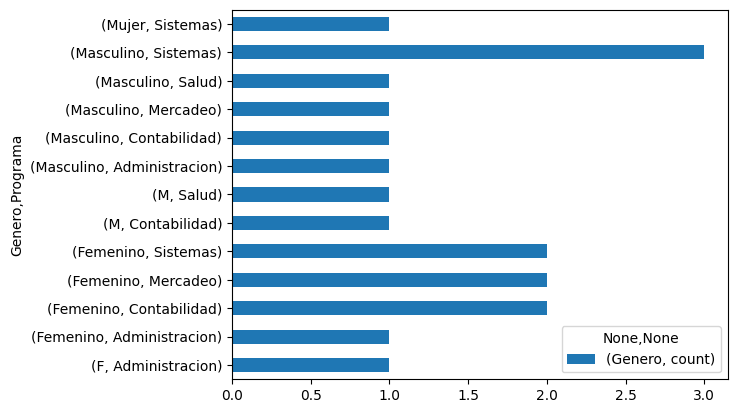

In [ ]:
# 5. Graficaciones
# NOTA: Cantidad de estudiantes por genero en cada programa

est_prog_count.plot(kind='barh')

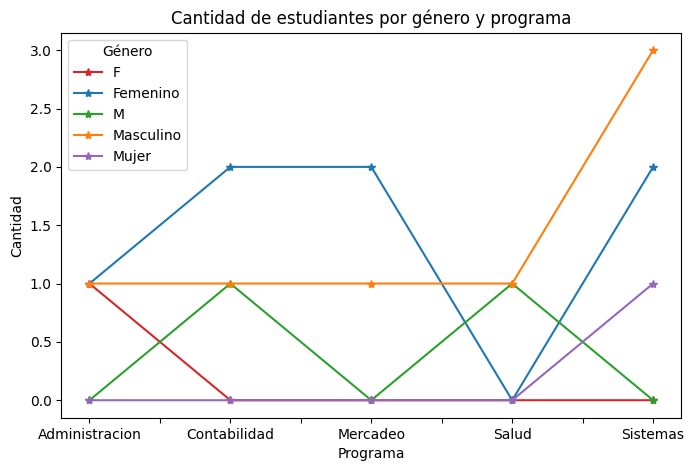

In [ ]:
# 5. Graficaciones Matplotlib
# NOTA: Cantidad de estudiantes por genero en cada programa

bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']

# Agrupar por programa y género
graf_est_gen_prog = dataset.groupby(['Programa', 'Genero']).size().unstack(fill_value=0)

# Graficar directamente desde pandas (una línea por género)
graf_est_gen_prog.plot(
    kind='line',
    color=bar_colors,
    marker='*',
    linestyle='solid',
    figsize=(8,5),
    title='Cantidad de estudiantes por género y programa'
)

# Personalizar etiquetas
plt.xlabel('Programa')
plt.ylabel('Cantidad')
plt.legend(title='Género')
plt.show()
